<a href="https://colab.research.google.com/github/pyagoubi/Customer-Analysis/blob/main/Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [45]:
data = pd.read_csv('/content/drive/MyDrive/upwork2/CutDownfile - Members and holdings 16.02.2023 (1).csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,32,35,43,52,53,58,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
data.head(5)

,MemberNumber,UserRef,InternalRef2,Country,MemberStatus,DateofDeath,DOB,Sex,ContactforCorres,SARef,...,CurrentUnitsCalculated,CurrentUnitsManual,BookValue,CurrentValueCalculated,ValDate,ValLatest,VotingRights,UserAssClass,UserAssGrp,UnRegFg
0,12,MW00012,1.0,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,62894.57,285342.01,11/30/2022,285342.01,NaN,NaN,NaN,NaN
1,12,MW00012,1.0,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,5768.16,5773.80,2/1/2023,5773.80,NaN,NaN,NaN,NaN
2,19,MW00019,2.0,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,8495.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN
3,19,MW00019,2.0,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,48287.27,47133.99,2/14/2023,47133.99,NaN,NaN,NaN,NaN
4,20,MW00020,4.0,United Kingdom,Full Drawdown,NaN,2/7/48 0:00,Male,Member,SA0001,...,NaN,NaN,16995.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN


# Checking main info

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MemberNumber            9799 non-null   int64  
 1   UserRef                 9798 non-null   object 
 2   InternalRef2            16 non-null     float64
 3   Country                 9788 non-null   object 
 4   MemberStatus            9799 non-null   object 
 5   DateofDeath             3 non-null      object 
 6   DOB                     9797 non-null   object 
 7   Sex                     9795 non-null   object 
 8   ContactforCorres        9799 non-null   object 
 9   SARef                   9799 non-null   object 
 10  SchemeName              9795 non-null   object 
 11  BrandName               9792 non-null   object 
 12  BrandRef                9792 non-null   object 
 13  ProposedRetireAge       9793 non-null   float64
 14  ProposedRetireDate      9791 non-null   

The dataset contains 9799 rows and 70 columns. Columns do have different datatypes and are either float, object or int.  
There seems to be missing values at different levels.

# Redundant columns

Some information seem redundant

In [48]:
data[['NextRenewalDate', 'NextRenewalMonth', 'NextRenewalDay']]

,NextRenewalDate,NextRenewalMonth,NextRenewalDay
0,4/2/24 0:00,4.0,2
1,4/2/24 0:00,4.0,2
2,4/1/24 0:00,4.0,1
3,4/1/24 0:00,4.0,1
4,4/1/24 0:00,4.0,1
...,...,...,...
9794,6/29/23 0:00,6.0,29
9795,10/12/22 0:00,10.0,12
9796,10/12/22 0:00,10.0,12
9797,10/12/22 0:00,10.0,12


In [49]:
data[['CommencementDate', 'CommencementMonth', 'CommencementYear']]

,CommencementDate,CommencementMonth,CommencementYear
0,4/22/04 0:00,4,2004
1,4/22/04 0:00,4,2004
2,5/26/04 0:00,5,2004
3,5/26/04 0:00,5,2004
4,5/26/04 0:00,5,2004
...,...,...,...
9794,6/29/17 0:00,6,2017
9795,10/12/22 0:00,10,2022
9796,10/12/22 0:00,10,2022
9797,10/12/22 0:00,10,2022


We can drop the columns: 'CommencementMonth', 'CommencementYear', 'NextRenewalMonth', 'NextRenewalDay'

In [50]:
#drop columns
data.drop(['CommencementMonth', 'CommencementYear', 'NextRenewalMonth', 'NextRenewalDay'], axis=1, inplace=True)

Birthday information can be inferred 

In [54]:
data[['75thBirthday', '75before2262010', '77thBirthday', 'DOB'] ].isnull().sum()

75thBirthday       2
75before2262010    0
77thBirthday       2
DOB                2
dtype: int64

In [61]:
data.loc[(data['75thBirthday'].isnull()) & (data['77thBirthday'].isnull()) & (data['DOB'].isnull()) , '75before2262010']

423    N
424    N
Name: 75before2262010, dtype: object

Since NAN values are the same, there is no additional information in keeping the birthday columns.

In [62]:
#drop columns
data.drop(['75thBirthday', '77thBirthday', '75before2262010'], axis=1, inplace=True)

In [66]:
data

,MemberNumber,UserRef,InternalRef2,Country,MemberStatus,DateofDeath,DOB,Sex,ContactforCorres,SARef,...,CurrentUnitsCalculated,CurrentUnitsManual,BookValue,CurrentValueCalculated,ValDate,ValLatest,VotingRights,UserAssClass,UserAssGrp,UnRegFg
0,12,MW00012,1.0,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,62894.57,285342.01,11/30/2022,285342.01,NaN,NaN,NaN,NaN
1,12,MW00012,1.0,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,5768.16,5773.80,2/1/2023,5773.80,NaN,NaN,NaN,NaN
2,19,MW00019,2.0,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,8495.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN
3,19,MW00019,2.0,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,48287.27,47133.99,2/14/2023,47133.99,NaN,NaN,NaN,NaN
4,20,MW00020,4.0,United Kingdom,Full Drawdown,NaN,2/7/48 0:00,Male,Member,SA0001,...,NaN,NaN,16995.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,2765,CJ2765,NaN,United Kingdom,Active,NaN,10/9/60 0:00,Male,Member,SA0002,...,NaN,NaN,0.00,0.00,6/29/2017,0.00,NaN,NaN,NaN,NaN
9795,7211,AL039700,NaN,Qatar,Active,NaN,2/6/62 0:00,Male,Intermediary,SA0002,...,NaN,NaN,0.00,0.00,1/20/2023,0.00,NaN,NaN,NaN,NaN
9796,7211,AL039700,NaN,Qatar,Active,NaN,2/6/62 0:00,Male,Intermediary,SA0002,...,NaN,NaN,0.00,90312.47,1/20/2023,90312.47,NaN,Investment Portfolio,Investment Portfolios,NaN
9797,7213,AL041600,NaN,United States,Full Drawdown,NaN,4/18/67 0:00,Male,Member,SA0002,...,NaN,NaN,0.00,326341.46,NaN,326341.46,NaN,Investment Portfolio,Investment Portfolios,NaN


# Checking missing values

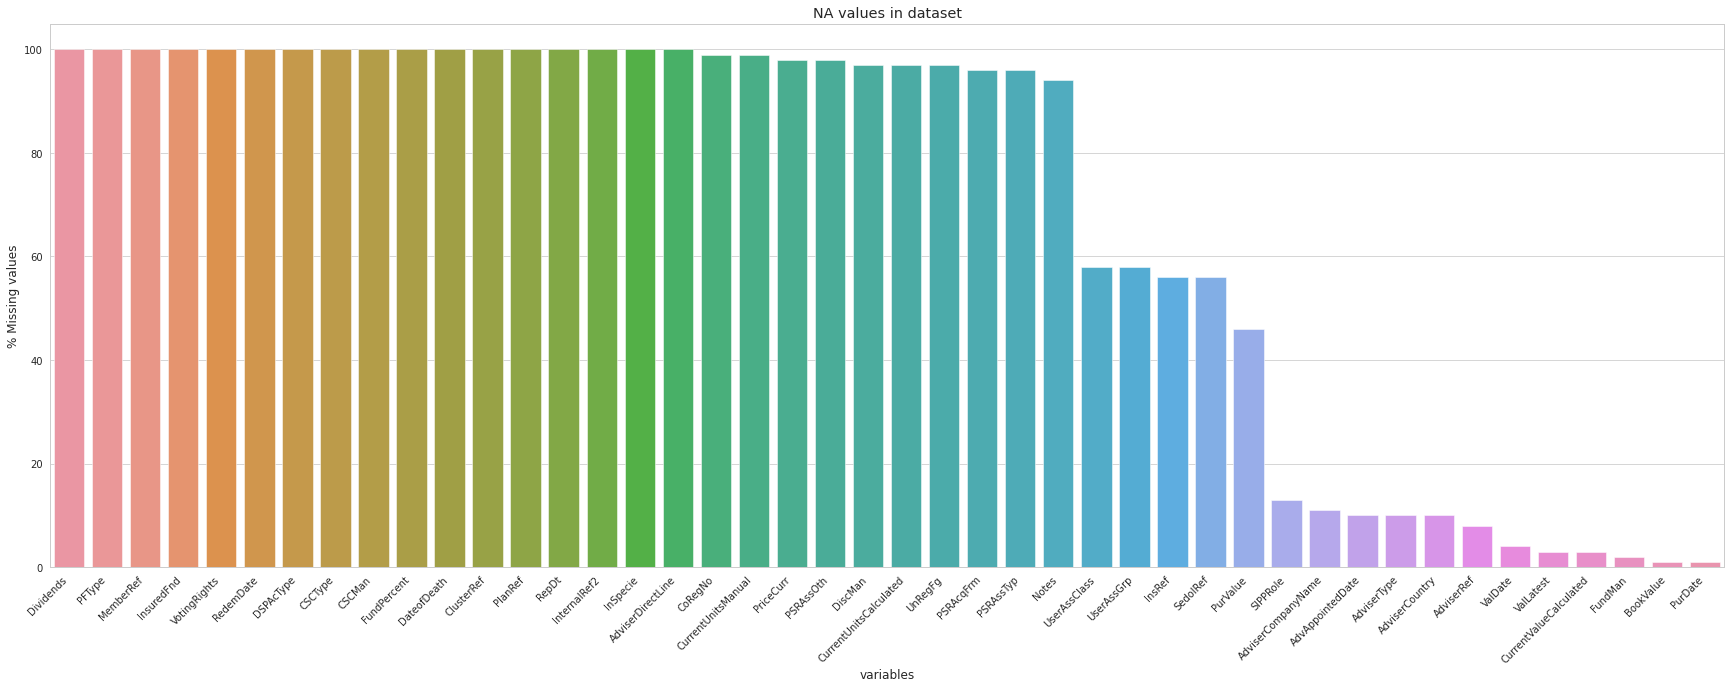

In [67]:
#create a dataframes with percentages of missing values
missing = pd.DataFrame(columns = ['% Missing values'],data = 100*round(data.isnull().sum().sort_values(ascending = False)/len(data),2))
missing_nz = missing[missing['% Missing values']>0.0].reset_index().rename(columns={'index': 'variables'})


#Plot missing values
#plt.style.use('ggplot')
fig, ax = plt.subplots(1,1, figsize=(30,10))

ax.set_title('NA values in dataset')
sns.barplot(data=missing_nz,x=missing_nz.variables,y=missing_nz['% Missing values'], orient = 'v', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [68]:
print(missing[missing['% Missing values']>90].count())
print(missing[(missing['% Missing values']>40) & (missing['% Missing values']<=60)].count())
print(missing[missing['% Missing values']<=20].count())

% Missing values    27
dtype: int64
% Missing values    5
dtype: int64
% Missing values    31
dtype: int64


Missing values can be classified as follows  
* 27 variables do have a high portion of missing values (close to 100%) --> these variables will be dropped 
* 5 variables have a portion of missing values between 40% and 60% 
* 31 variebles have less than 20% missing values

In [35]:
# dropping variables with very high No of missing values
remove = list(missing[missing['% Missing values']>90].index)
data.drop(remove, inplace =True, axis =1)

# Check duplicated rows

In [69]:
data.duplicated().sum()

0

No duplicate rows